#### Performing QC, dim reduction and clustering on GSE213243 
##### This was initially performed with KT, repeating hear to check understanding and for records
Before the below point GSE213243 files were unzipped with tar -xvf and renamed correctly. Only completing analysis on tumour here, but dataset also contains ascites and pbmc

The below analysis is based on that done in the Seurat tutorial

In [3]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE213243/S1_tumour')
getwd()

[1] "/scratch/user/s4436039/scdata/GSE213243/S1_tumour"

[1] "/scratch/user/s4436039/scdata/GSE213243/S1_tumour"

In [4]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Loading required package: SeuratObject

Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.2”

Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Warning message:
“package ‘patchwork’ was built under R version 4.3.2”


In [5]:
#load dataset
OC.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE213243/S1_tumour")

In [6]:
#Add dataset info to colnames
colnames(OC.data) <- paste0("GSE213243_S1_tumour_", colnames(OC.data))

In [7]:
#Initialise the Seurat object
OC <- CreateSeuratObject(counts = OC.data, project = "GSE213243", min.cells = 3, min.features = 200)

In [8]:
#add metadata to sample
OC@meta.data$sample_type <- "tumour"
OC@meta.data$cancer_type <- "HGSOC"

In [9]:
OC

An object of class Seurat 
31021 features across 9218 samples within 1 assay 
Active assay: RNA (31021 features, 0 variable features)
 1 layer present: counts

In [10]:
head(OC@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type
,<fct>,<dbl>,<int>,<chr>,<chr>
GSE213243_S1_tumour_AAACCCAAGCATGTTC-1,GSE213243,662,511,tumour,HGSOC
GSE213243_S1_tumour_AAACCCACAAGCAATA-1,GSE213243,32151,5905,tumour,HGSOC
GSE213243_S1_tumour_AAACCCAGTCGTCAGC-1,GSE213243,12780,4053,tumour,HGSOC
GSE213243_S1_tumour_AAACCCAGTGACGTCC-1,GSE213243,557,402,tumour,HGSOC
GSE213243_S1_tumour_AAACCCATCACAAGAA-1,GSE213243,20366,5209,tumour,HGSOC
GSE213243_S1_tumour_AAACCCATCCGTATAG-1,GSE213243,7222,2839,tumour,HGSOC


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


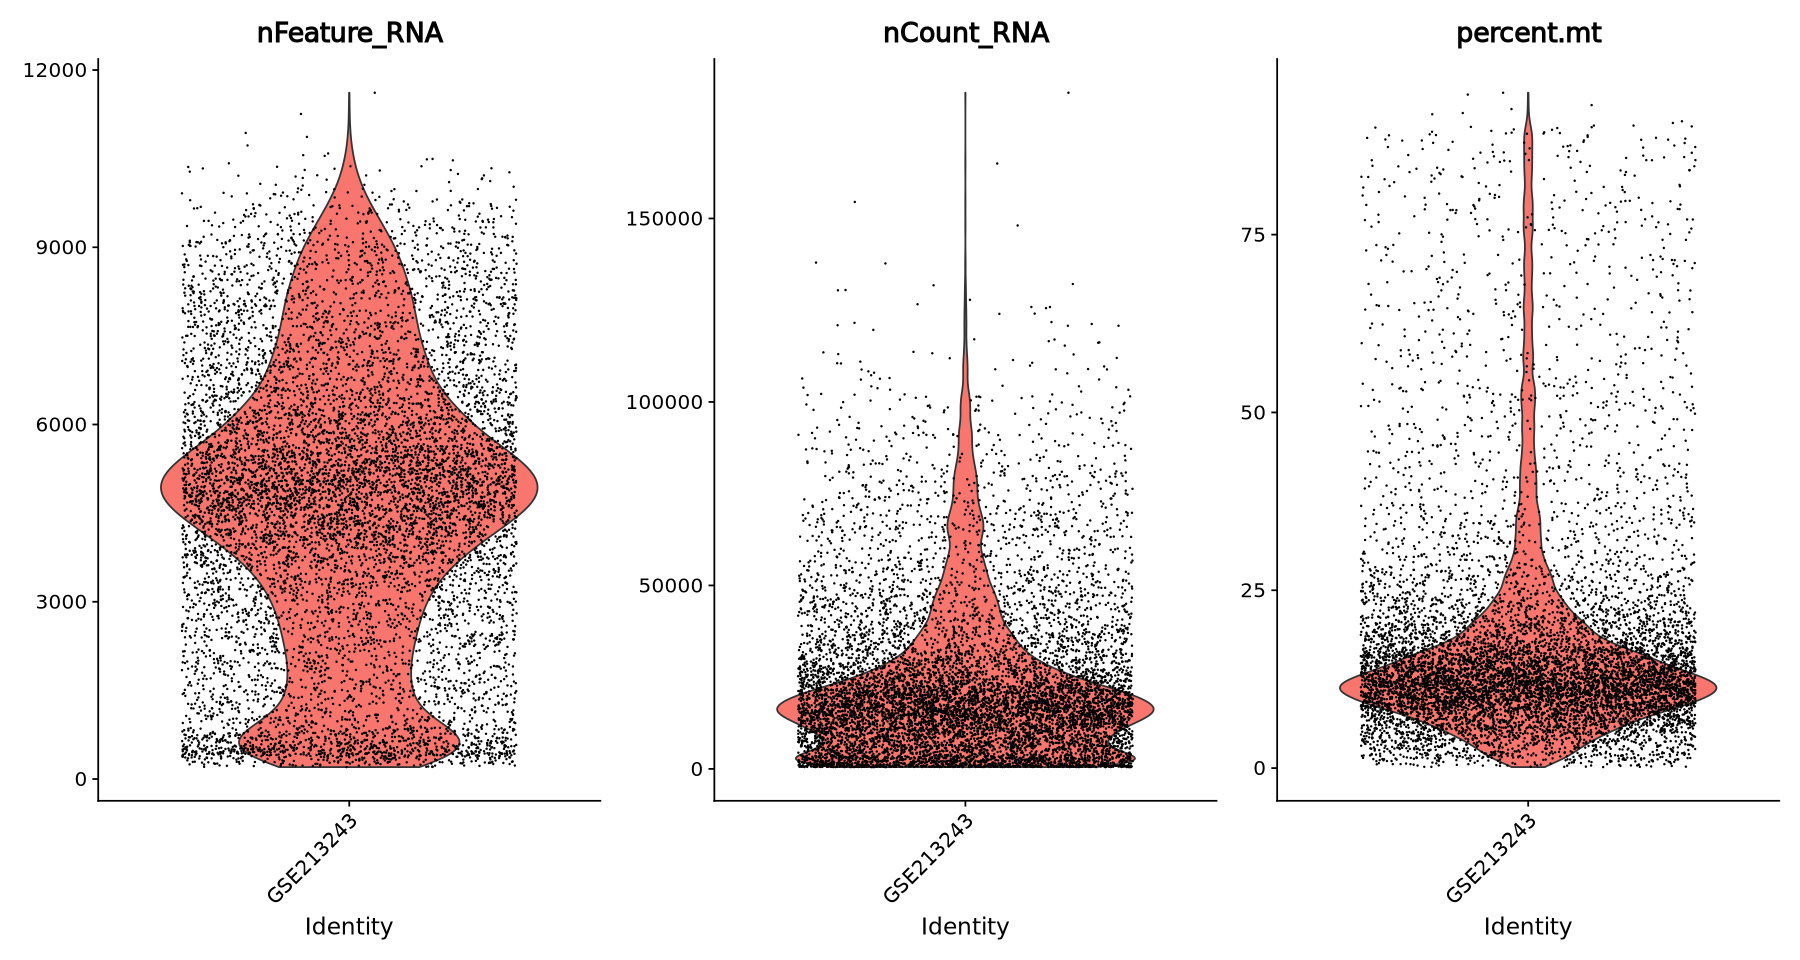

In [11]:
#QC Steps 
OC[["percent.mt"]] <- PercentageFeatureSet(OC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(OC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [13]:
#Subset based on QC metrics
#This step is in the PBMC tutorial, not doing here (tissue) as using QC metrics during scaling instead
#OC <- subset(OC, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)
#VlnPlot(OC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [14]:
#Normalise the data
OC <- NormalizeData(OC)
#Find variable features
OC <- FindVariableFeatures(OC, selection.method = "vst", nfeatures = 2000)
#Scale the data
OC <- ScaleData(OC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
OC <- RunPCA(OC, features = VariableFeatures(object = OC))

Normalizing layer: counts

Finding variable features for layer counts

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  S100A13, CAPS, LEMD1, CTXN1, CHI3L1, MORN2, SLPI, MDK, IGFBP2, CLU 
	   TSPAN1, DNALI1, SMIM22, IGFBP5, METRN, RSPH1, C9orf116, STXBP6, ASRGL1, SNHG29 
	   CCDC74A, MACROD2, KIF9, KCNK15, C2orf88, PCSK1N, RBP1, TUBB4B, PIFO, AC007906.2 
Negative:  LAPTM5, TYROBP, FCER1G, SRGN, ITGB2, AIF1, RGS1, VIM, CD14, FCGRT 
	   TGFBI, C1QA, C1QC, SPP1, SPI1, MSR1, MS4A7, PLEK, FYB1, ZEB2 
	   ADAP2, LSP1, DAB2, GPNMB, FCGR2A, C1QB, CSF1R, EMP3, APOE, PTPRC 
PC_ 2 
Positive:  C20orf85, CAPSL, C5orf49, MORN5, TUBA4B, CFAP126, FAM183A, WDR38, C1orf194, TEKT1 
	   CFAP45, RIIAD1, PIFO, GPR162, EFCAB1, ROPN1L, ZMYND10, TPPP3, RSPH1, MAP3K19 
	   C11orf88, LRRC6, C9orf135, ZBBX, LKAAEAR1, EFCAB10, C1orf158, LRRIQ1, ODF3B, RSPH4A 
Negative:  CENPW, IGFBP2, MARCKSL1, SNHG29, MKI67, MDK, BIRC5, TPX2, PTTG1, AQP5 
	   HMMR, CHI3L1, LEMD1, CKS2, C

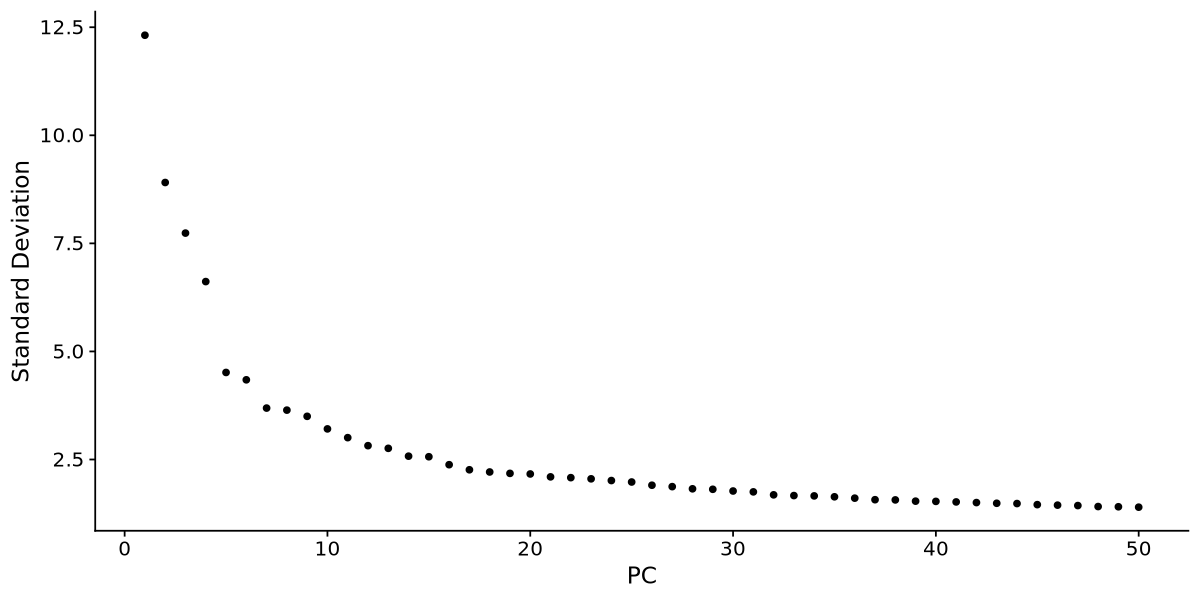

In [15]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(OC, ndims=50)
#from this decide to use 40 PC (stay consistent across datasets)

In [16]:
#Find neighbours (make sure number matches no. features chosen above)
OC <- FindNeighbors(OC, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [17]:
#Run UMAP
OC <- RunUMAP(OC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:04:09 UMAP embedding parameters a = 0.9922 b = 1.112

14:04:09 Read 9218 rows and found 40 numeric columns

14:04:09 Using Annoy for neighbor search, n_neighbors = 30

14:04:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:04:09 Writing NN index file to temp file /scratch/temp/8714319/RtmpKtzf6n/file1ab48327cbf420

14:04:09 Searching Annoy index using 1 thread, search_k = 3000

14:04:11 Annoy recall = 100%

14:04:12 Commencing smooth kNN distance calibration using 1 thread
 with t

In [19]:
#Cluster, resolution here set to 0.5, originally tried 1 which gave 19 clusters, 0.5 gives 14
OC <- FindClusters(OC, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9218
Number of edges: 339461

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8844
Number of communities: 14
Elapsed time: 1 seconds


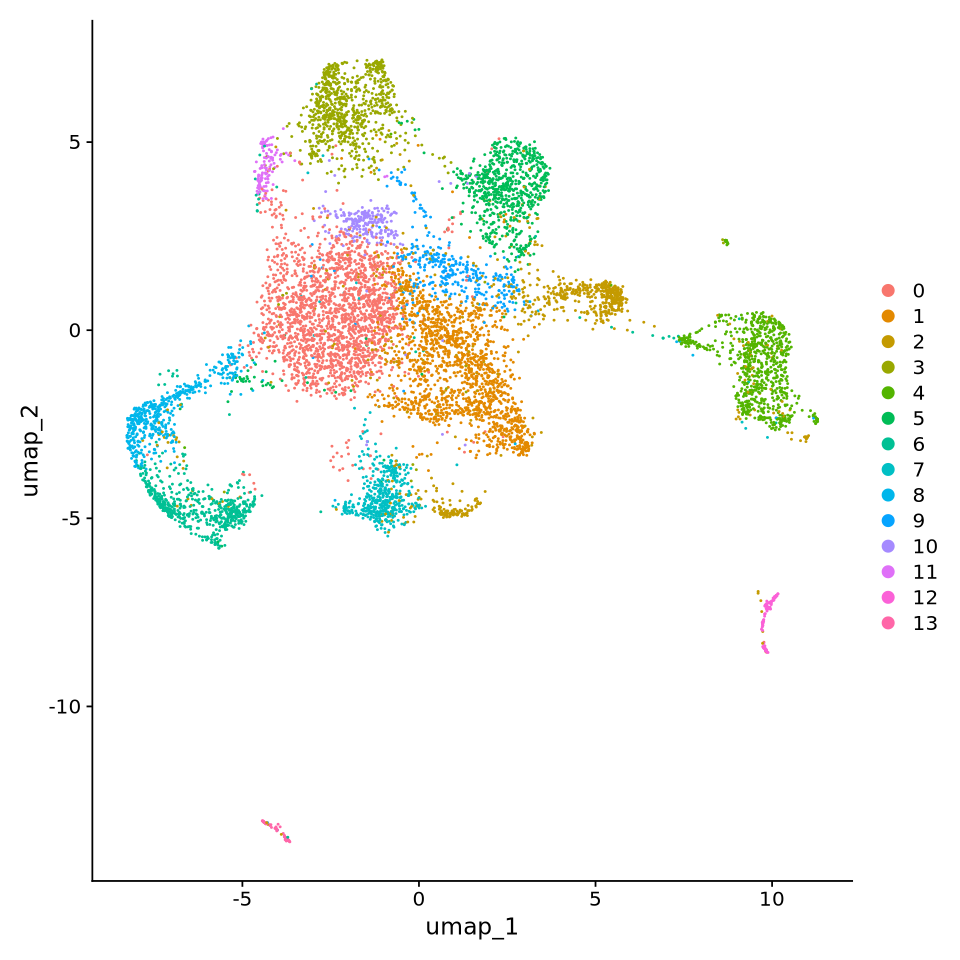

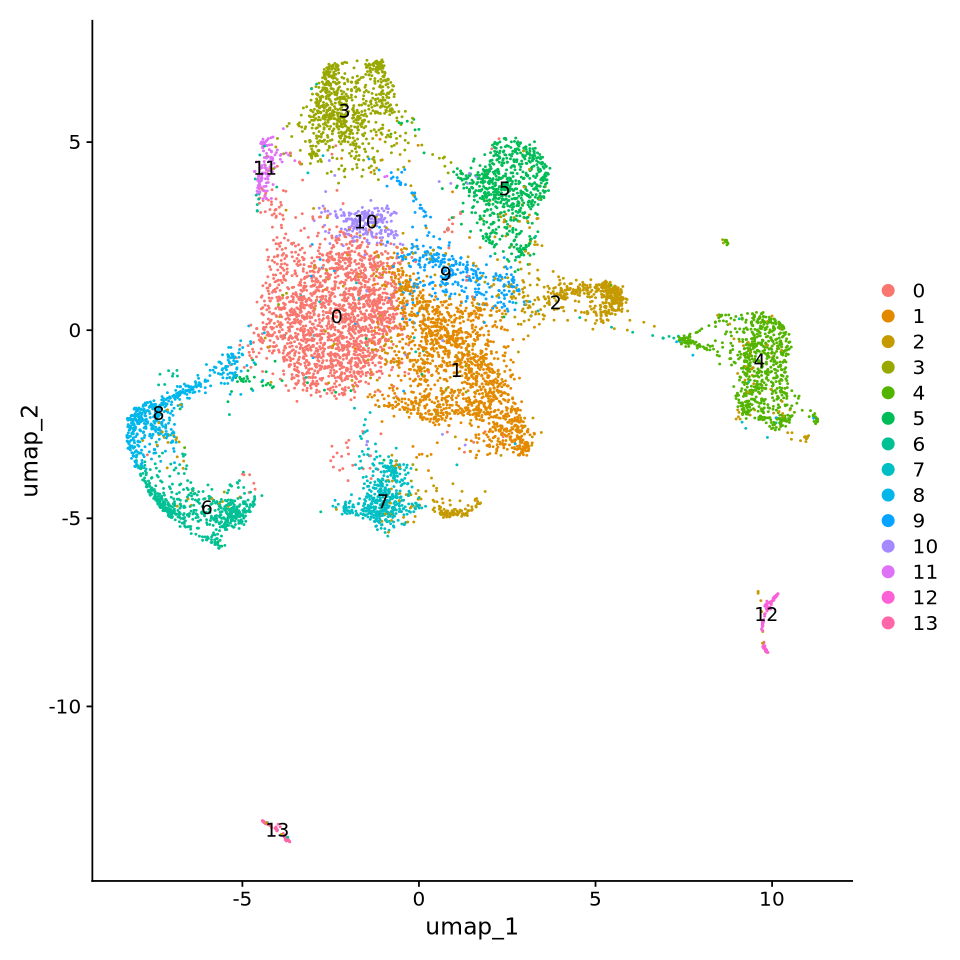

In [25]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=8)
DimPlot(OC, reduction = "umap")
DimPlot(OC, reduction = "umap", label=TRUE)

In [24]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(OC, file = "/scratch/user/s4436039/scdata/GSE213243/S1_tumour.RDS")

#### Next part of code is about determining with cluster is the myeloid cells

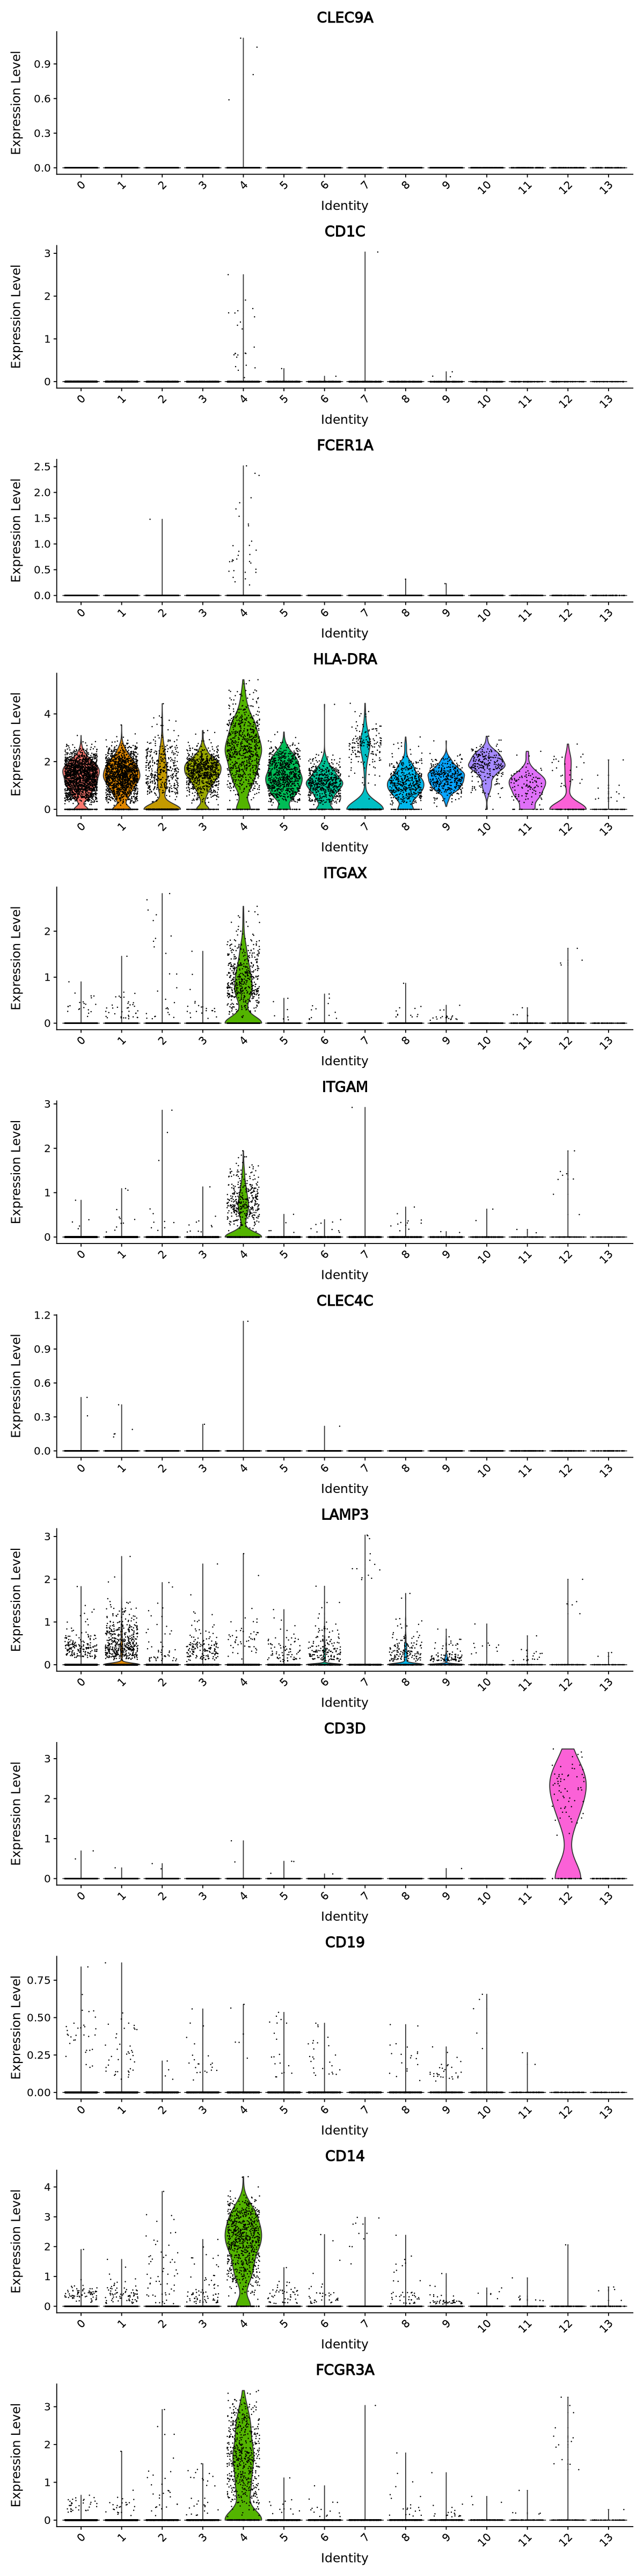

In [31]:
#Violin plots of classic markers
#ITGAX = CD11c
#ITGAM = CD11b
#BDCA2 = CLEC4C
#FCGR3A = CD16a
options(repr.plot.height=40, repr.plot.width=10)
VlnPlot(OC, features = c("CLEC9A", "CD1C", "FCER1A", "HLA-DRA", "ITGAX", "ITGAM", "CLEC4C", "LAMP3", "CD3D", "CD19", "CD14", "FCGR3A"), ncol=1)

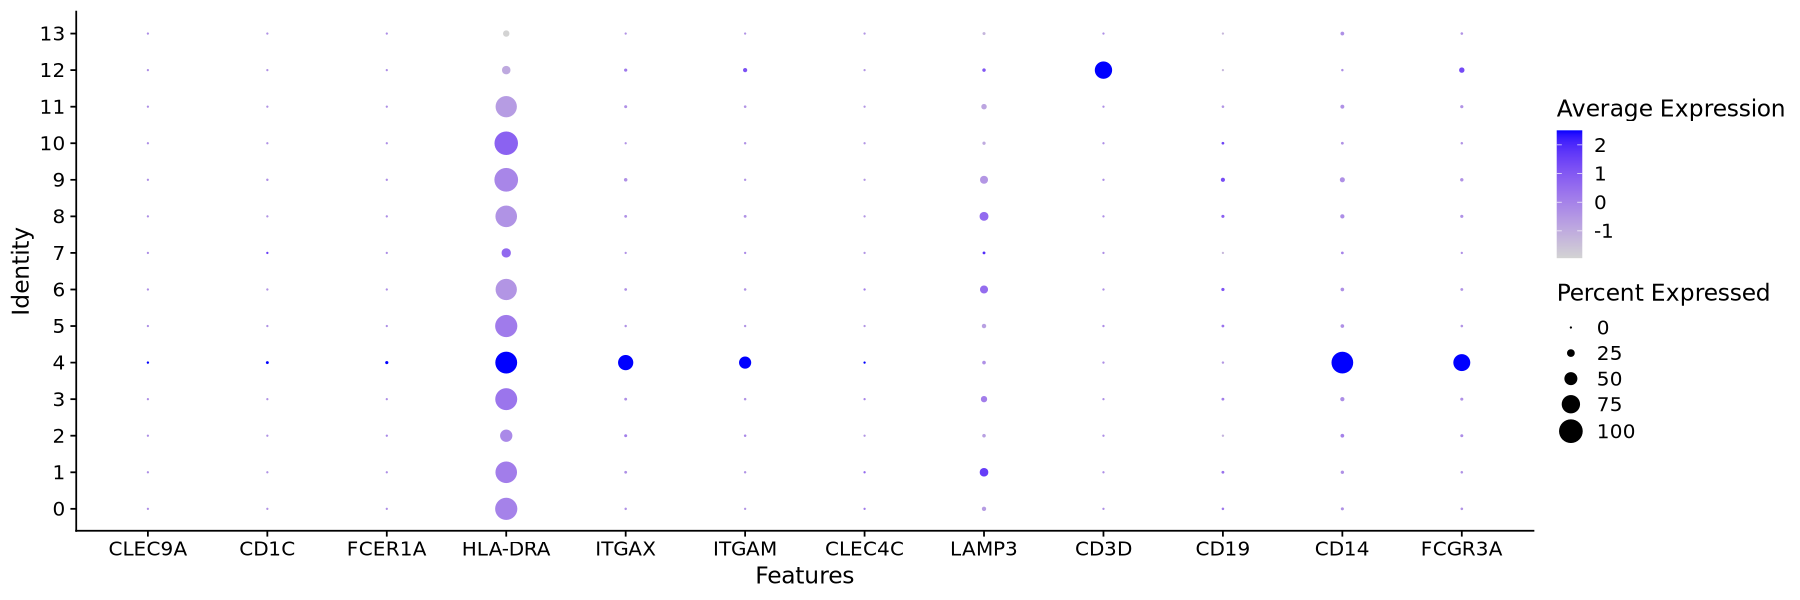

In [33]:
#Same as above but dot plot
options(repr.plot.height=5, repr.plot.width=15)
DotPlot(OC, features = c("CLEC9A", "CD1C", "FCER1A", "HLA-DRA", "ITGAX", "ITGAM", "CLEC4C", "LAMP3", "CD3D", "CD19", "CD14", "FCGR3A"))


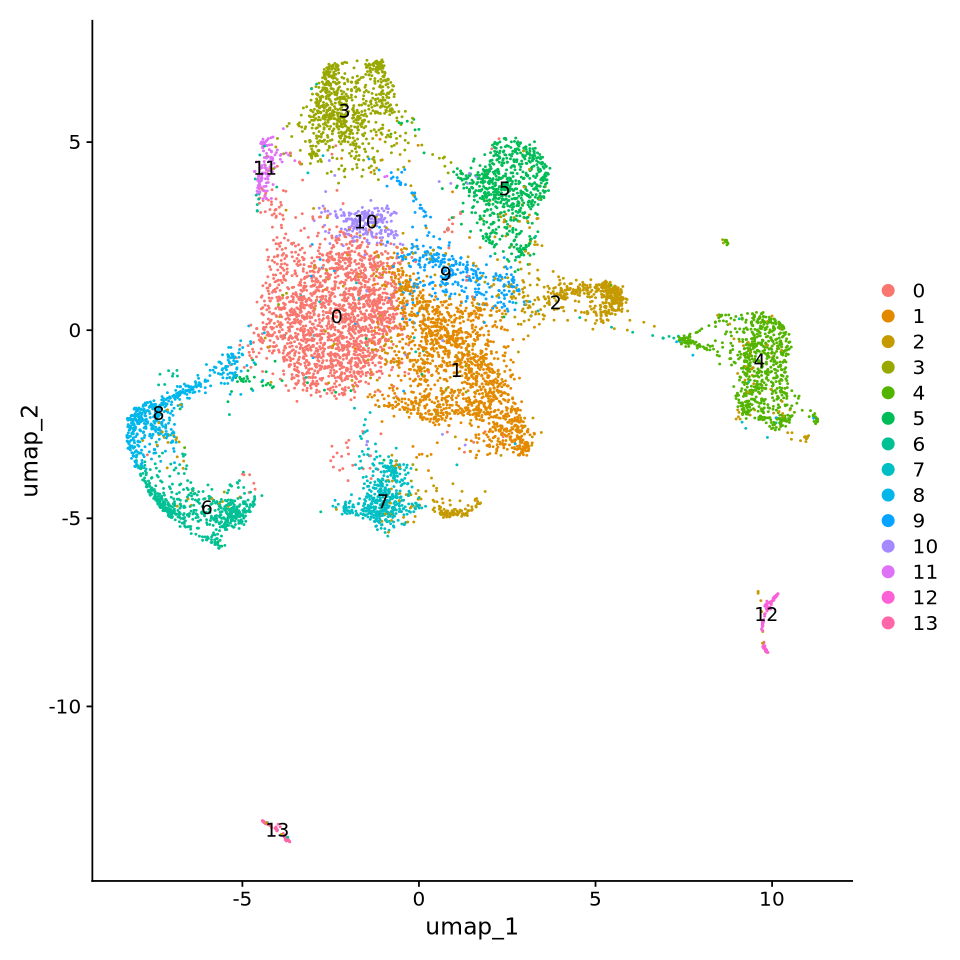

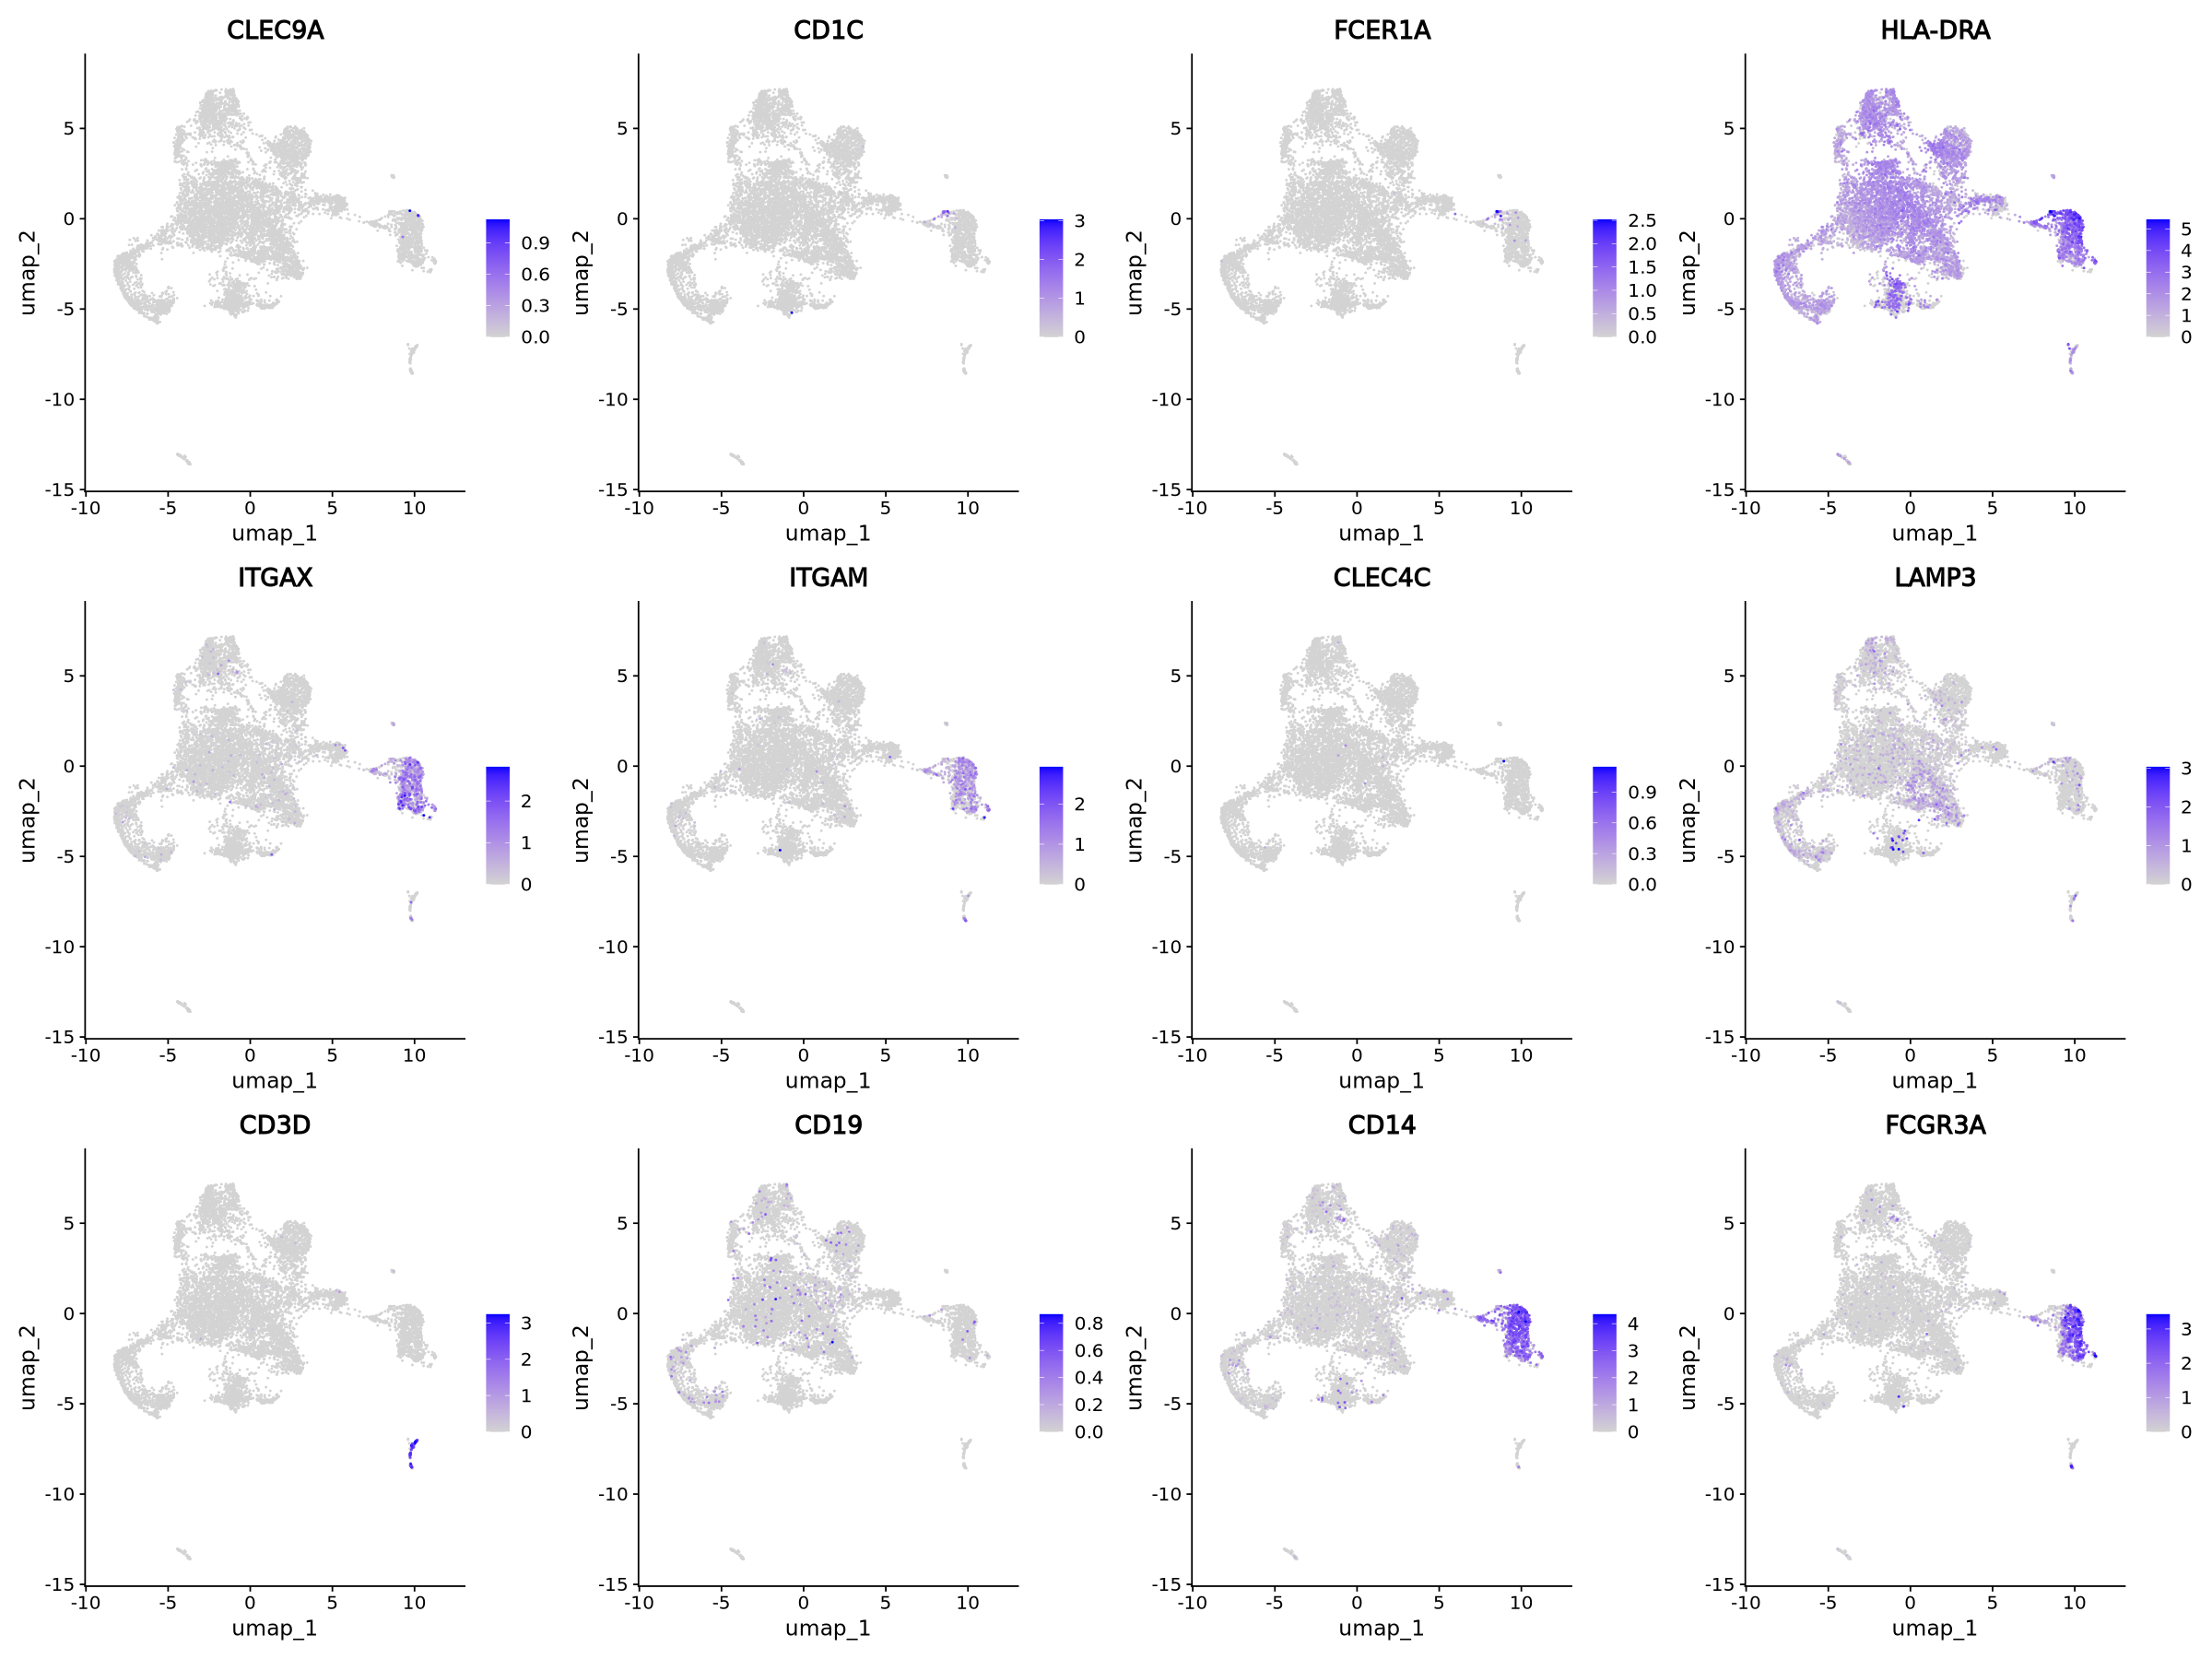

In [34]:
#Same again but plotted over UMAP
options(repr.plot.height=8, repr.plot.width=8)
DimPlot(OC, reduction = "umap", label=TRUE)

options(repr.plot.height=15, repr.plot.width=20)
FeaturePlot(OC, features = c("CLEC9A", "CD1C", "FCER1A", "HLA-DRA", "ITGAX", "ITGAM", "CLEC4C", "LAMP3", "CD3D", "CD19", "CD14", "FCGR3A"), order = TRUE)

#### From above it looks like cluster 4 is the myeloid cells, now subsetting out cluster 4

In [35]:
head(OC@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,percent.mt,RNA_snn_res.0.5,seurat_clusters
,<fct>,<dbl>,<int>,<chr>,<chr>,<dbl>,<fct>,<fct>
GSE213243_S1_tumour_AAACCCAAGCATGTTC-1,GSE213243,662,511,tumour,HGSOC,3.172205,7,7
GSE213243_S1_tumour_AAACCCACAAGCAATA-1,GSE213243,32151,5905,tumour,HGSOC,14.540761,0,0
GSE213243_S1_tumour_AAACCCAGTCGTCAGC-1,GSE213243,12780,4053,tumour,HGSOC,10.242567,8,8
GSE213243_S1_tumour_AAACCCAGTGACGTCC-1,GSE213243,557,402,tumour,HGSOC,8.078995,7,7
GSE213243_S1_tumour_AAACCCATCACAAGAA-1,GSE213243,20366,5209,tumour,HGSOC,16.267308,0,0
GSE213243_S1_tumour_AAACCCATCCGTATAG-1,GSE213243,7222,2839,tumour,HGSOC,15.951260,8,8


In [36]:
myeloid_OC <- subset(OC, subset = RNA_snn_res.0.5 %in% c("4"))

In [37]:
myeloid_OC

An object of class Seurat 
31021 features across 790 samples within 1 assay 
Active assay: RNA (31021 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [39]:
saveRDS(myeloid_OC, "/scratch/user/s4436039/scdata/GSE213243/S1_tumour_myeloid.RDS")

#### Following the above then need to move entire GSE213243 folder from scratch to rdm

``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE213243/ /QRISdata/Q5935/nikita/scdata/GSE213243
```
